In [5]:
# Libraries:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
import os

from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import Lasso

sys.path.append("/home/mattg/D_CODE") # A questo punto è necessario per non doverlo chiamare i file che usano D_CODE.
from D_CODE.run_simulation import run as run_SRT
from D_CODE.run_simulation_vi import run as run_DCODE
from toolbox.auxiliary_functions import set_param_freq

from data import equations
from data import SINDy_data

## Parte 1

In [6]:
# Select ODE & settings:
ode_name = 'TVLvODE2_d' # help="name of the ode", type=str
ode_param = "1.,-0.1,-1.5,0.075" # help="parameters of the ode (default: None)", type=str, default=None
freq = 20 # Dovrebbe essere 195 per avere dt = 5.130 * 10−3 come nel paper di riferimento
dt = 1 / freq
n_sample = 50 # help="number of trajectories", type=int, default=100
noise_ratio = 0.01 # help="noise level (default 0)", type=float, default=0.
dim_x = 3 # help="dimentionality of the problem", type=int
dim_k = 0 # help="dimentionality of the parameterizaiton discovery", type=int
# ode_param, freq = set_param_freq(ode_param, freq)
# ode = equations.get_ode(ode_name, ode_param)
# time_vector = np.arange(0, ode.T + dt, dt)

In [ ]:
# generate data:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name=ode_name, 
                                                                   ode_param=ode_param,
                                                                   freq=freq,
                                                                   n_sample=n_sample,
                                                                   noise_ratio=noise_ratio,
                                                                   dim_x=dim_x,
                                                                   dim_k=dim_k)
# X_list = SINDy_data.existence_conditions(X_list, ode.init_low, n_variables=dim_x)

# save data:
# file_path = 'saved/data/TVLvODE_data.pkl'
# os.makedirs(os.path.dirname(file_path), exist_ok=True)
# with open(file_path, 'wb') as f:
#     dill.dump((X_list, dX_list, param_list, feature_names), f)

Con rumore ci impiega poco piu di 2 min per generare una singola traiettoria.
Si potrebbe parallelizzare, ma comunque la generazione è molto lunga.
In questa fase di testing possiamo mettere o rumore nullo o giocare con una sola traiettoria.
Ricorda di cambiare la std_base    

In [ ]:
SINDy_data.plot_configuration(X_list)
SINDy_data.plot_configuration(np.array(X_list)[:,:,0:2])

In [ ]:
# uploda data:
# file_path = 'saved/data/TVLvODE_data.pkl'
# with open(file_path, 'rb') as f:
#     X_list, dX_list, param_list, feature_names = dill.load(f)

In [ ]:
# X = np.array(X_list)[:,:,:2]
# print('Shape: ',X.shape)

# vec_rmse = []
# for i in range(X.shape[0]):
#     rmse = root_mean_squared_error(X[i], np.zeros(X[i].shape))
#     print('RMSE: ', rmse)
#     vec_rmse.append(rmse)

# vec_rmse = np.array(vec_rmse)
# print('RMSE Mean: ', vec_rmse.mean())

In [ ]:
# TODO
# Fare Symbolic Regressiom:
# - Riesce a trovare il building block decisivo?
# - Per gestire l'impulso serve una moving window temporale: -> i risultati sono ancora robusti
# Runnare Symbolic-SINDy
# aggiustare Symbolic-SINDy di conseguenza


In [ ]:
print("Running with: ode_name={}, ode_param={}, x_id={}, freq={}, n_sample={}, noise_sigma={}, alg={}, seed={}, n_seed={}".format(
    ode_name, ode_param, 0, freq, n_sample, noise_ratio, 'tv', 100, 1))

if ode_param is not None:
    param = [float(x) for x in ode_param.split(',')]
else:
    param = None
if freq >= 1:
    freq = int(freq)
else:
    freq = freq

run_SRT(ode_name, param, 0, freq, n_sample, noise_ratio, 'tv', seed=100, n_seed=1, T0=0, T=10.) # -> 0.0420862788771289*X2 
# run_SRT(ode_name, param, 0, freq, n_sample, noise_ratio, 'tv', seed=100, n_seed=1, T0=0., T=10.)
None

# 15-25: 
# 0.00177125486972347*X0*(-2*X1 + X2)
# 0.0420862788771289*X0*(-2*X1 + X2 + sin(0.7889684801741323*X2) + 1.5837180399827058)
# sin(0.7889684801741323*X2)
# 0.0841725577542578*X2

Running with: ode_name=TVLvODE2_d, ode_param=1.,-0.1,-1.5,0.075, x_id=0, freq=20, n_sample=50, noise_sigma=0.01, alg=tv, seed=100, n_seed=1
 
Simulazione tra:  [ 50 , 60 ]
ODE specified:  TVLvODE2_d
Data generated
Dataset shape before smoothing:  (201, 50, 3)


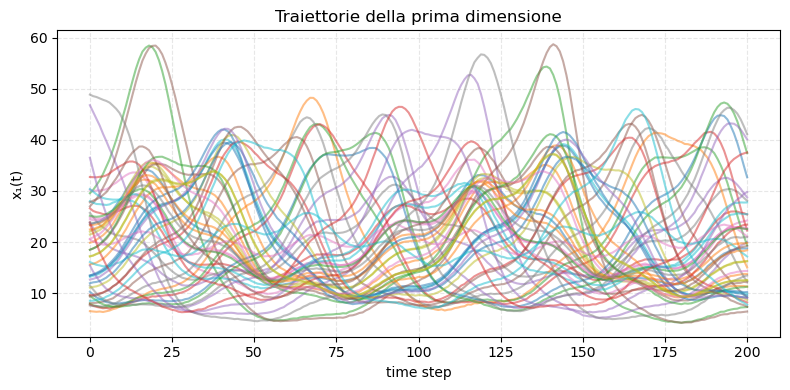

Dataset shape:  (201, 50, 3)
Functions set:  {'neg': 1, 'mul': 1, 'add': 1, 'sub': 1, 'sin': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.09      3.20385e+38       11           8973.4          24115.7      3.44m
   1     9.70      8.78871e+14       34          9012.36          23926.3      3.59m
   2    10.99      5.25493e+14        3          8648.52            25075      2.41m
 
promising programs:
neg(neg(sin(X0)))
sub(sub(sub(sub(X1, X1), sin(X2)), sin(add(sin(4.692), add(X0, X1)))), neg(sin(mul(X1, X0))))
neg(sin(X1))
sin(sin(sin(0.038)))
sin(mul(sin(sub(X1, X1)), sin(sin(X2))))
sin(sub(neg(neg(sin(X2))), X1))
neg(sin(add(sub(neg(sub(neg(X0), neg(X0))), sin(2.875)), X1)))
sin(sub(sin(neg(mul(X1, X1))), X1))
mul(add(add(add(X2, X0), sin(2.594)), X2), sin(sub(X2, X2)))
s

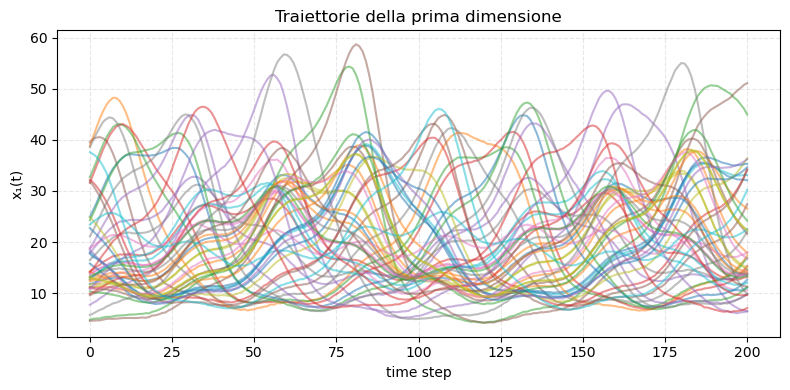

Dataset shape:  (201, 50, 3)
Functions set:  {'neg': 1, 'mul': 1, 'add': 1, 'sub': 1, 'sin': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.09      1.67193e+39        3          41017.7            52221      2.20m
   1     8.87      1.70015e+15        8            40601          53131.3      2.19m
   2     8.22      4.09566e+13       19          40069.7            49052      1.89m
 
promising programs:
sub(add(sin(mul(sub(sin(X1), add(X1, X1)), sin(mul(X2, X1)))), sub(add(sin(mul(sub(sin(X1), add(X1, X1)), sin(mul(X2, X1)))), sub(sub(sin(mul(X0, X2)), sin(sin(sin(mul(X1, X0))))), sub(add(sin(2.833), sub(X1, X0)), sin(sin(X0))))), sub(sin(sin(neg(sin(X2)))), sin(sub(add(add(sub(2.641, X2), add(3.367, X2)), sub(X1, X1)), sin(neg(X2))))))), sub(sin(sin(neg(sin(X2)))), sin(sub(ad

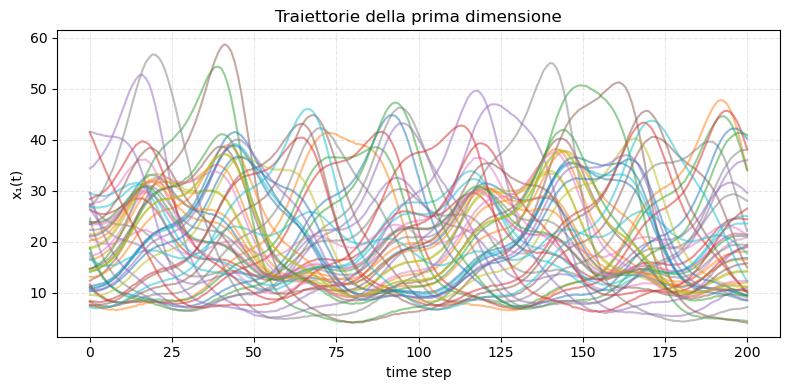

Dataset shape:  (201, 50, 3)
Functions set:  {'neg': 1, 'mul': 1, 'add': 1, 'sub': 1, 'sin': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.09      3.36489e+37       12          67567.8           109074      1.99m
   1     7.26      3.82796e+14       11          66901.8           121567      1.92m
   2     6.34      1.41121e+12       15          66386.8           136419      1.61m
 
promising programs:
sub(sin(neg(X2)), add(X2, sub(mul(1.360, X2), sub(X2, X1))))
sub(add(sin(neg(X2)), sub(sub(3.442, X2), sin(X0))), mul(sin(sin(3.381)), add(add(X0, X0), add(X0, sin(X2)))))
add(sub(X1, X1), sub(X0, X2))
sub(mul(4.811, sin(neg(X2))), add(X1, X2))
neg(add(X2, X1))
add(mul(sin(X2), neg(4.541)), sub(sub(3.211, add(neg(neg(X1)), X2)), sin(sub(mul(0.599, X0), X2))))
sub(sub(X0, X2), s

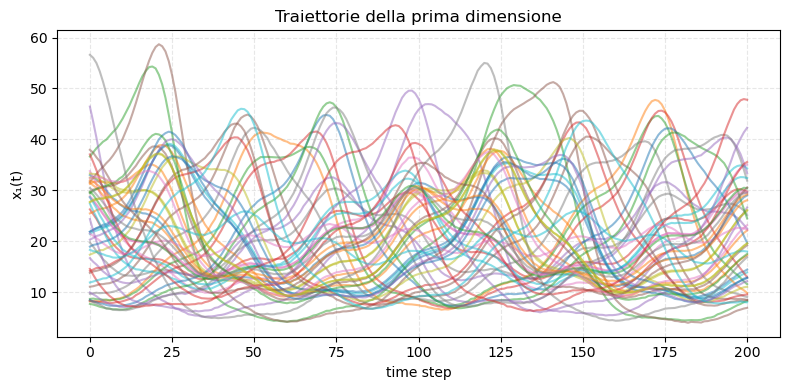

Dataset shape:  (201, 50, 3)
Functions set:  {'neg': 1, 'mul': 1, 'add': 1, 'sub': 1, 'sin': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.09       1.5768e+39       64          53404.6          50686.9      1.99m
   1     7.36      1.83584e+14       65          52339.8          60269.9      1.88m
   2     7.42       1.5169e+14       64          52237.3          61192.7      1.72m
 
promising programs:
add(neg(add(sub(add(X0, X1), sub(X0, X1)), sub(4.837, X0))), mul(sin(neg(add(X2, X2))), 3.278))
add(sub(mul(add(add(sub(0.364, X0), neg(X0)), mul(sub(2.119, X1), sub(X2, X0))), mul(sin(sub(X1, X1)), mul(sin(X1), X0))), sub(add(mul(sub(2.250, X1), sub(X0, X0)), add(add(4.458, X1), add(X0, X0))), sub(sub(add(X0, X0), sub(X1, X0)), sin(add(X0, X2))))), sin(sin(neg(mul(neg(X0), sin

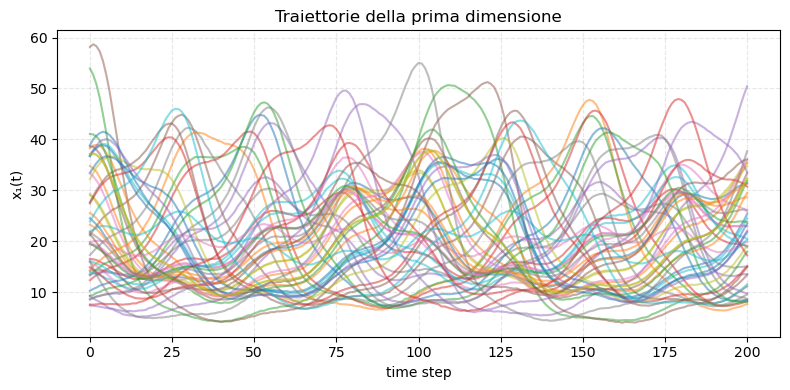

Dataset shape:  (201, 50, 3)
Functions set:  {'neg': 1, 'mul': 1, 'add': 1, 'sub': 1, 'sin': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.09      3.04887e+39        4          57388.2          97896.1      1.94m
   1     7.34       4.1164e+17        6          55097.5           113694      1.95m
   2     5.64      3.02879e+14        3          56012.5           111280      1.71m
 
promising programs:
add(sub(4.702, X1), sin(X0))
add(sub(mul(add(add(sub(0.364, X0), neg(X0)), mul(sub(2.119, X1), sub(X2, X0))), mul(sin(sub(X1, X1)), mul(sin(X1), add(X0, X0)))), sub(add(mul(sub(X2, X2), sin(X2)), add(add(4.458, X1), add(X0, X0))), sub(sub(add(X0, X0), sub(X1, X0)), sin(add(X0, X2))))), sin(sin(neg(mul(neg(X0), sin(sub(5.244, X1)))))))
sub(X0, add(X1, X1))
add(sub(mul(sub(4.013,

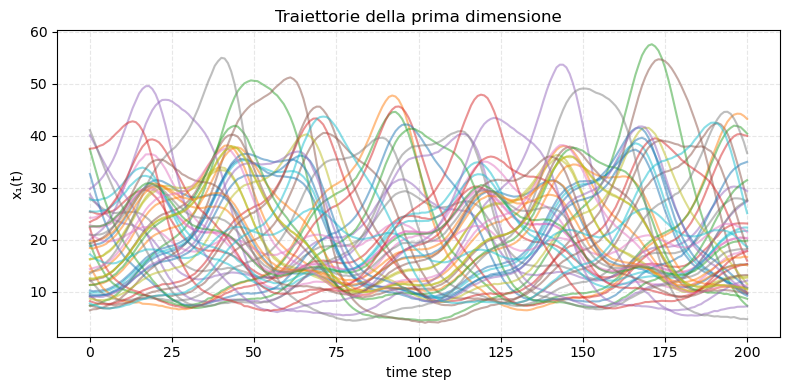

Dataset shape:  (201, 50, 3)
Functions set:  {'neg': 1, 'mul': 1, 'add': 1, 'sub': 1, 'sin': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.09       1.9064e+40       11          8806.81          26362.1      2.53m
   1     9.72      1.52974e+15        7           8935.3          25546.5      2.41m
   2    10.85      1.06862e+18       13          8543.29          13739.2      2.21m
 
promising programs:
add(sub(sub(X0, X1), X1), neg(neg(2.385)))
add(sub(sub(0.781, X1), X2), add(sub(2.473, X1), add(X2, X0)))
add(sub(sub(X0, X1), X1), sin(X2))
sub(X0, add(X1, X1))
add(sub(sub(0.781, X1), X2), add(sub(2.473, X1), add(X2, X0)))
add(sub(sub(0.781, X1), X2), add(sub(2.473, X1), add(X2, X0)))
add(sub(sub(0.781, X1), X2), add(sub(2.473, X1), add(X2, X0)))
sub(sub(3.701, X1), sub(X1, X

In [7]:
print("Running with: ode_name={}, ode_param={}, x_id={}, freq={}, n_sample={}, noise_sigma={}, alg={}, seed={}, n_seed={}".format(
    ode_name, ode_param, 0, freq, n_sample, noise_ratio, 'tv', 100, 1))

if ode_param is not None:
    param = [float(x) for x in ode_param.split(',')]
else:
    param = None
if freq >= 1:
    freq = int(freq)
else:
    freq = freq


Start = [50,53,55,56,57,60] #,23,25,27,30,33,35]
for T in Start:
    print(' ')
    print('Simulazione tra: ', '[',T, ',',T+10, ']')
    run_DCODE(ode_name, param, 0, freq, n_sample, noise_ratio, seed=100, n_seed=1, T0=T, T=T+10)
    None

In [ ]:
for i in range(20):
    X = np.array(X_list[i])
    vec = np.linspace(0.05, 30, 600)
    plt.plot(vec, X[0:600,0])

In [24]:
# Load data:
file_path = 'Online-Test/saved/data/TVLvODE2_d_data.pkl'
with open(file_path, 'rb') as f:
    X_list, dX_list, param_list, feature_names = dill.load(f)

X_lista = [np.array(x)[440:640, :] for x in X_list]
dX_lista = [np.array(dx)[440:640, :] for dx in dX_list]

# lambda function:
building_blocks_lambda = lambda X0, X1, X2: np.sin(5.0298*X2)
function_names = lambda X0, X1, X2: "sin( 5.0298*"+ X2 + " )"

# building the library:
from toolbox.auxiliary_functions import intercept_library_fun
intercept_library = intercept_library_fun(dim_x+dim_k)
polynomial_library = ps.PolynomialLibrary(degree=2, include_bias=False)
custom_library = ps.CustomLibrary(library_functions=[building_blocks_lambda], function_names=[function_names]) # custom library with building block
generalized_library = ps.GeneralizedLibrary(libraries=[polynomial_library, custom_library],tensor_array=[[1, 1]])
final_library = ps.ConcatLibrary([intercept_library, generalized_library]) # add the intercept


model = ps.SINDy(feature_names=feature_names, feature_library=final_library, optimizer=ps.STLSQ(threshold=0.07))
model.fit(X_lista, t=dt, multiple_trajectories=True, x_dot=dX_lista)
print("Symbolic-SINDy model: ")
model.print()
model.get_feature_names()

Symbolic-SINDy model: 
(X0)' = -1.028 1 + 1.070 X0 + -0.101 X0 X1 + 3.809 sin( 5.0298*X2 ) + 0.251 X0 sin( 5.0298*X2 ) + -0.137 X2 sin( 5.0298*X2 )
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 0.999 1


['1',
 'X0',
 'X1',
 'X2',
 'X0^2',
 'X0 X1',
 'X0 X2',
 'X1^2',
 'X1 X2',
 'X2^2',
 'sin( 5.0298*X2 )',
 'X0 sin( 5.0298*X2 )',
 'X1 sin( 5.0298*X2 )',
 'X2 sin( 5.0298*X2 )',
 'X0^2 sin( 5.0298*X2 )',
 'X0 X1 sin( 5.0298*X2 )',
 'X0 X2 sin( 5.0298*X2 )',
 'X1^2 sin( 5.0298*X2 )',
 'X1 X2 sin( 5.0298*X2 )',
 'X2^2 sin( 5.0298*X2 )']

Con una traiettoria e rumore l'identificazione della strutta è corretta al netto delle costanti.
Pero non viene captata la dipendenza da tempo. Ed è una cosa scontata data l'evoluzione lenta dei paramatri

Con tante traitteorie ma non rumore l'identificazione è piu robusta, ma è ovvio. Neanche in questo caso viene identificata l'evoluzione temporale. 
Anche variando i parametri con una frequenza alta, l'evoluzione è talmente repentina che non si percepiscono effetti chiari sulla traiettoria.

Bisognerebbe forse creare delle variazioni nei parametri che generino cambi evidenti sulle traiettorie in un intervallo di 10-15 secondi che non siano impulsi. 
Nota che SINDy, avendo blocchi lineari, riconosce la struttura di Lokta-Volterra, mentre la SR fa fatica a riconoscerla (con o senza variazione nei parametri). Se togliamo il logaritmo meglio (soprattutto se ampliamo l'ampiezza del sin (0.3 di ampiezza e 1 di frequenza becca esatto LV))... 

## Parte 2

In [ ]:
# Select ODE & settings:
ode_name = 'TVLvODE3' # help="name of the ode", type=str
ode_param = "1.,-0.1,-1.5, 0.075" # help="parameters of the ode (default: None)", type=str, default=None
freq = 10 # Dovrebbe essere 195 per avere dt = 5.130 * 10−3 come nel paper di riferimento
dt = 1 / freq
n_sample = 50 # help="number of trajectories", type=int, default=100
noise_ratio = 0.01 # help="noise level (default 0)", type=float, default=0.
dim_x = 3 # help="dimentionality of the problem", type=int
dim_k = 0
ode_param, freq = set_param_freq(ode_param, freq)
ode = equations.get_ode(ode_name, ode_param)
time_vector = np.arange(0, ode.T + dt, dt)

In [3]:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name=ode_name, 
                                                                   ode_param=ode_param,
                                                                   freq=freq,
                                                                   n_sample=1,
                                                                   noise_ratio=noise_ratio,
                                                                   dim_x=dim_x,
                                                                   dim_k=dim_k)

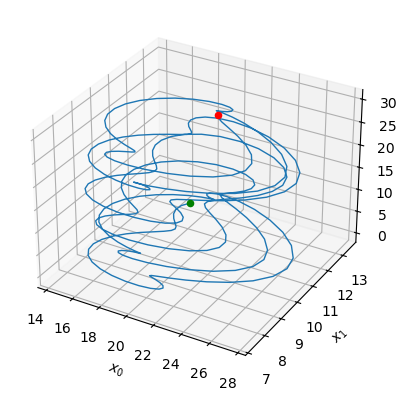

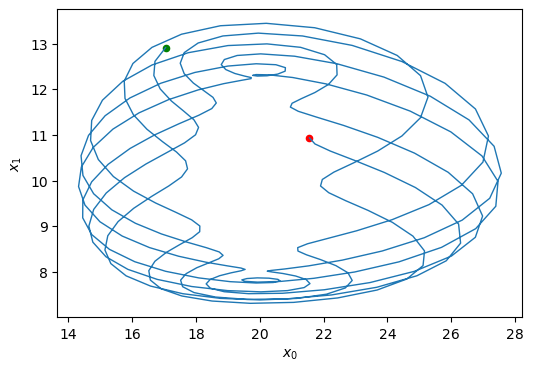

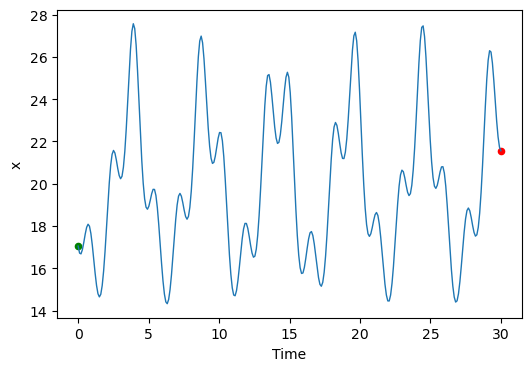

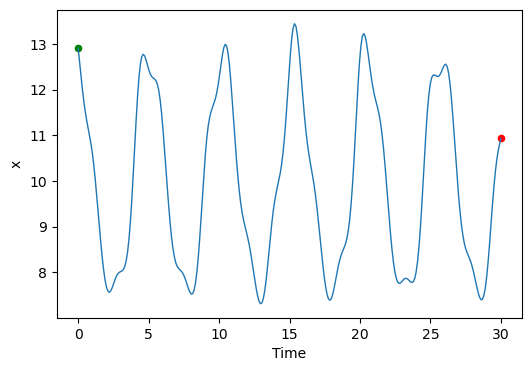

In [4]:
SINDy_data.plot_configuration(X_list)
SINDy_data.plot_configuration(np.array(X_list)[:,:,0:2])
SINDy_data.plot_configuration(np.array(X_list)[:,:,0:1], 30)
SINDy_data.plot_configuration(np.array(X_list)[:,:,1:2], 30)

Running with: ode_name=TVLvODE3, ode_param=1.,-0.1,-1.5,0.075, x_id=0, freq=20, n_sample=50, noise_sigma=0.01, alg=tv, seed=100, n_seed=1
 
Simulazione tra:  [ 0 , 30 ]
ODE specified:  TVLvODE3
Data generated
Dataset shape before smoothing:  (201, 50, 3)


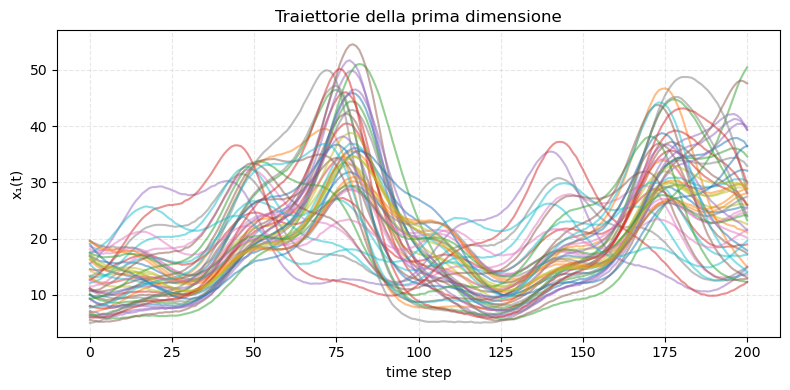

Dataset shape:  (201, 50, 3)
Functions set:  {'neg': 1, 'mul': 1, 'add': 1, 'sub': 1, 'sin': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.09      7.96628e+32        6           8435.4          7699.36      2.59m
   1     8.09       5.6755e+10       12          7555.18          6550.52      2.17m
   2     7.70      5.92153e+12        9          7222.79           7343.3      2.07m
 
promising programs:
add(4.109, add(sub(4.154, X1), add(sub(4.822, X1), X2)))
sub(add(sub(0.102, X1), add(3.676, X2)), sub(neg(4.198), sub(4.309, X1)))
neg(sub(neg(2.684), neg(neg(add(add(2.556, sin(X2)), add(4.389, sub(1.190, X1)))))))
add(add(4.109, add(sub(4.154, X1), sin(2.102))), add(sin(sub(X2, neg(X1))), sin(sin(X2))))
add(4.109, add(add(2.556, sin(X2)), add(4.389, sub(1.190, X1))))
neg(neg(

In [3]:
print("Running with: ode_name={}, ode_param={}, x_id={}, freq={}, n_sample={}, noise_sigma={}, alg={}, seed={}, n_seed={}".format(
    ode_name, ode_param, 0, freq, n_sample, noise_ratio, 'tv', 100, 1))

if ode_param is not None:
    param = [float(x) for x in ode_param.split(',')]
else:
    param = None
if freq >= 1:
    freq = int(freq)
else:
    freq = freq


Start = [0]#, 5, 10, 15, 20]
for T in Start:
    print(' ')
    print('Simulazione tra: ', '[',T, ',',T+30, ']')
    run_DCODE(ode_name, param, 0, freq, n_sample, noise_ratio, seed=100, n_seed=1, T0=T, T=T+10)
    None

In [ ]:
print("Running with: ode_name={}, ode_param={}, x_id={}, freq={}, n_sample={}, noise_sigma={}, alg={}, seed={}, n_seed={}".format(
    ode_name, ode_param, 0, freq, n_sample, noise_ratio, 'tv', 100, 1))

if ode_param is not None:
    param = [float(x) for x in ode_param.split(',')]
else:
    param = None
if freq >= 1:
    freq = int(freq)
else:
    freq = freq

run_SRT(ode_name, param, 0, freq, n_sample, noise_ratio, 'tv', seed=100, n_seed=1, T0=0, T=20.) # -> 0.0420862788771289*X2 
# run_SRT(ode_name, param, 0, freq, n_sample, noise_ratio, 'tv', seed=100, n_seed=1, T0=0., T=10.)
None